In [8]:
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [13]:
df= pd.read_csv('./data_cancer_mama.data') 
#veamos que tiene el dataset

In [14]:
df.head(5)

,id,Diagnostico,radioMD,texturaMD,perímetroMD,áreaMD,suavidadMD,compacidadMD,concavidadMD,puntos cóncavosMD,...,radioPeor,texturaPeor,perímetroPeor,áreaPeor,suavidadPeor,compacidadPeor,concavidadPeor,puntos cóncavosPeor,simetríaPeor,dimensión fractal Peor
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      569 non-null    int64  
 1   Diagnostico             569 non-null    object 
 2   radioMD                 569 non-null    float64
 3   texturaMD               569 non-null    float64
 4   perímetroMD             569 non-null    float64
 5   áreaMD                  569 non-null    float64
 6   suavidadMD              569 non-null    float64
 7   compacidadMD            569 non-null    float64
 8   concavidadMD            569 non-null    float64
 9   puntos cóncavosMD       569 non-null    float64
 10  simetríaMD              569 non-null    float64
 11  dimensión fractal MD    569 non-null    float64
 12  radioSE                 569 non-null    float64
 13  texturaSE               569 non-null    float64
 14  perímetroSE             569 non-null    fl

In [16]:
# la calidad de vino tiene un valor minimo de 3 y maximo de 8 esta caracteristica del dataset será importante para la predicción
# se recomdaría utilizar un dataset que contenga vinos con todas las calidades posibles
df.describe()

,id,radioMD,texturaMD,perímetroMD,áreaMD,suavidadMD,compacidadMD,concavidadMD,puntos cóncavosMD,simetríaMD,...,radioPeor,texturaPeor,perímetroPeor,áreaPeor,suavidadPeor,compacidadPeor,concavidadPeor,puntos cóncavosPeor,simetríaPeor,dimensión fractal Peor
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [19]:
#localizamos los duplicados
duplicates = df.duplicated('id', keep = False)
df[duplicates]

,id,Diagnostico,radioMD,texturaMD,perímetroMD,áreaMD,suavidadMD,compacidadMD,concavidadMD,puntos cóncavosMD,...,radioPeor,texturaPeor,perímetroPeor,áreaPeor,suavidadPeor,compacidadPeor,concavidadPeor,puntos cóncavosPeor,simetríaPeor,dimensión fractal Peor


In [20]:
# localizamos los valores null
null_columns= df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

Series([], dtype: float64)

In [21]:
df.loc[df['Diagnostico'] == 'M', 'DG'] = '1'
df.loc[df['Diagnostico'] == 'B', 'DG'] = '0'

In [22]:
df.head(10)

,id,Diagnostico,radioMD,texturaMD,perímetroMD,áreaMD,suavidadMD,compacidadMD,concavidadMD,puntos cóncavosMD,...,texturaPeor,perímetroPeor,áreaPeor,suavidadPeor,compacidadPeor,concavidadPeor,puntos cóncavosPeor,simetríaPeor,dimensión fractal Peor,DG
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,1
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,1
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,1
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,1
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,1


In [26]:
import numpy as np
piechart = np.array(df["DG"])
np.info(piechart)

class:  ndarray
shape:  (569,)
strides:  (8,)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x1cc85bd8e50
byteorder:  little
byteswap:  False
type: object


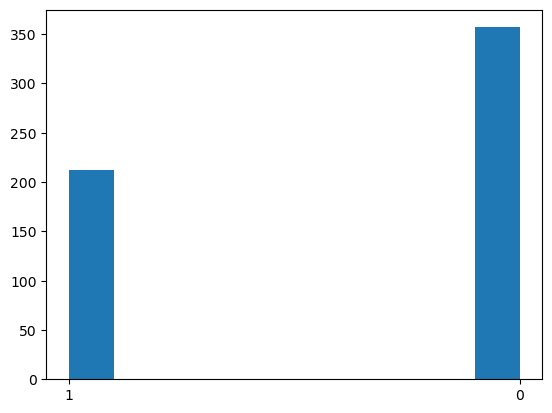

In [27]:
#la mayoría de valores soon mayores o iguales a 5 esto limitará la predicción  de vinos Bad
import matplotlib.pyplot as plt

plt.hist(piechart)
plt.show() 

In [39]:
#importamos sklearn y creamos nuestras variables para el análisis
# la variable X contiene las caracteristicas del vino desde fixed acidity hasta alcohol
#la variable y contiene los datos de la columna quality label

from sklearn.model_selection import train_test_split
X= df.copy().iloc[:,2:-3]
y= df["DG"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=200, random_state=1000)

In [40]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   radioMD               569 non-null    float64
 1   texturaMD             569 non-null    float64
 2   perímetroMD           569 non-null    float64
 3   áreaMD                569 non-null    float64
 4   suavidadMD            569 non-null    float64
 5   compacidadMD          569 non-null    float64
 6   concavidadMD          569 non-null    float64
 7   puntos cóncavosMD     569 non-null    float64
 8   simetríaMD            569 non-null    float64
 9   dimensión fractal MD  569 non-null    float64
 10  radioSE               569 non-null    float64
 11  texturaSE             569 non-null    float64
 12  perímetroSE           569 non-null    float64
 13  áreaSE                569 non-null    float64
 14  suavidadSE            569 non-null    float64
 15  compacidadSE          5

In [41]:
#nos cercioramos que los datos de nuestro DataFrame son númericos
X = X.astype(float)

In [42]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: DG, dtype: object

In [43]:
# importamos la herramienta para desarrollar el árbol de decisión
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=100)
clf = clf.fit(X_train, y_train)

In [44]:
X_test

,radioMD,texturaMD,perímetroMD,áreaMD,suavidadMD,compacidadMD,concavidadMD,puntos cóncavosMD,simetríaMD,dimensión fractal MD,...,simetríaSE,dimensión fractal SE,radioPeor,texturaPeor,perímetroPeor,áreaPeor,suavidadPeor,compacidadPeor,concavidadPeor,puntos cóncavosPeor
156,17.68,20.74,117.40,963.7,0.11150,0.16650,0.18550,0.10540,0.1971,0.06166,...,0.01778,0.004968,20.470,25.11,132.90,1302.0,0.14180,0.34980,0.35830,0.15150
45,18.65,17.60,123.70,1076.0,0.10990,0.16860,0.19740,0.10090,0.1907,0.06049,...,0.02428,0.003535,22.820,21.32,150.60,1567.0,0.16790,0.50900,0.73450,0.23780
272,21.75,20.99,147.30,1491.0,0.09401,0.19610,0.21950,0.10880,0.1721,0.06194,...,0.01924,0.004614,28.190,28.18,195.90,2384.0,0.12720,0.47250,0.58070,0.18410
23,21.16,23.04,137.20,1404.0,0.09428,0.10220,0.10970,0.08632,0.1769,0.05278,...,0.01083,0.001987,29.170,35.59,188.00,2615.0,0.14010,0.26000,0.31550,0.20090
491,17.85,13.23,114.60,992.1,0.07838,0.06217,0.04445,0.04178,0.1220,0.05243,...,0.01302,0.001309,19.820,18.42,127.10,1210.0,0.09862,0.09976,0.10480,0.08341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,10.82,24.21,68.89,361.6,0.08192,0.06602,0.01548,0.00816,0.1976,0.06328,...,0.02466,0.002977,13.030,31.45,83.90,505.6,0.12040,0.16330,0.06194,0.03264
192,9.72,18.22,60.73,288.1,0.06950,0.02344,0.00000,0.00000,0.1653,0.06447,...,0.03799,0.001688,9.968,20.83,62.25,303.8,0.07117,0.02729,0.00000,0.00000
117,14.87,16.67,98.64,682.5,0.11620,0.16490,0.16900,0.08923,0.2157,0.06768,...,0.01602,0.003884,18.810,27.37,127.10,1095.0,0.18780,0.44800,0.47040,0.20270
16,14.68,20.13,94.74,684.5,0.09867,0.07200,0.07395,0.05259,0.1586,0.05922,...,0.01410,0.002085,19.070,30.88,123.40,1138.0,0.14640,0.18710,0.29140,0.16090


In [45]:
#ejecutamos la predicción
predictions = clf.predict(X_test)
predictions

array(['1', '1', '1', '1', '1', '0', '1', '1', '1', '0', '1', '0', '0',
       '0', '0', '1', '1', '0', '0', '1', '0', '1', '1', '0', '0', '1',
       '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0',
       '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1',
       '0', '1', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0', '0',
       '0', '0', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '0',
       '1', '1', '0', '1', '0', '0', '0', '1', '0', '1', '0', '1', '0',
       '1', '0', '1', '0', '1', '0', '1', '0', '1', '1', '0', '1', '0',
       '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '1', '1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '1',
       '1', '0', '1', '0', '0', '1', '0', '1', '1', '1', '0', '0', '0',
       '1', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0', '1', '1',
       '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0', '1', '1',
       '1', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0', '1

In [47]:
#importamos métricas importantes para interpretarlas
#accuray score nos permite conocer el valor porcentual de aciertos totales en este caso 95%

from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.905

In [50]:
#la matriz de confusión nos enseña cuantas veces una clase fue asiganada correctamente en este caso 501 veces Good fue asignado correctamente
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions,labels = ("1", "0"))

array([[ 77,   4],
       [ 15, 104]], dtype=int64)

In [51]:
#precision score es el porcentaje de correctos positivos por cada clase, en este caso 96% de precision para Good
from sklearn.metrics import precision_score
precision_score(y_test, predictions, pos_label = "1")

0.8369565217391305

In [52]:
#precision score para vinos Bad es solo 42% esto porque no hay demasiados vinos con calificación menor a 5 en el dataset
from sklearn.metrics import precision_score
precision_score(y_test, predictions, pos_label = "0")

0.9629629629629629

In [53]:
features_names = X.columns
features_names

Index(['radioMD', 'texturaMD', 'perímetroMD', 'áreaMD', 'suavidadMD',
       'compacidadMD', 'concavidadMD', 'puntos cóncavosMD', 'simetríaMD',
       'dimensión fractal MD', 'radioSE', 'texturaSE', 'perímetroSE', 'áreaSE',
       'suavidadSE', 'compacidadSE', 'concavidadSE', 'puntos cóncavosSE',
       'simetríaSE', 'dimensión fractal SE', 'radioPeor', 'texturaPeor',
       'perímetroPeor', 'áreaPeor', 'suavidadPeor', 'compacidadPeor',
       'concavidadPeor', 'puntos cóncavosPeor'],
      dtype='object')

In [54]:
#obtenemos aquellas variables que son más importantes en nuestro arbol de decisión 
clf.feature_importances_

array([0.01137375, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.0521928 , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01224381, 0.        ,
       0.00500723, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.07556732, 0.73612415, 0.04892325, 0.        ,
       0.        , 0.        , 0.05856769])

In [55]:
features_dt = pd.DataFrame(clf.feature_importances_, index = features_names)
features_dt

,0
radioMD,0.011374
texturaMD,0.000000
perímetroMD,0.000000
áreaMD,0.000000
suavidadMD,0.000000
compacidadMD,0.000000
concavidadMD,0.000000
puntos cóncavosMD,0.052193
simetríaMD,0.000000
dimensión fractal MD,0.000000


<AxesSubplot:>

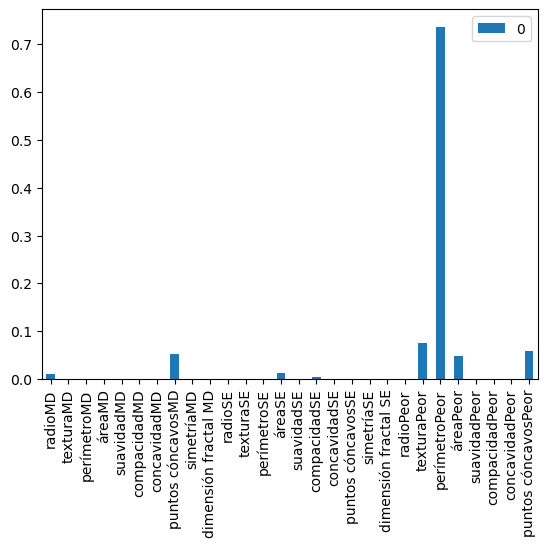

In [56]:
features_dt.plot(kind="bar")

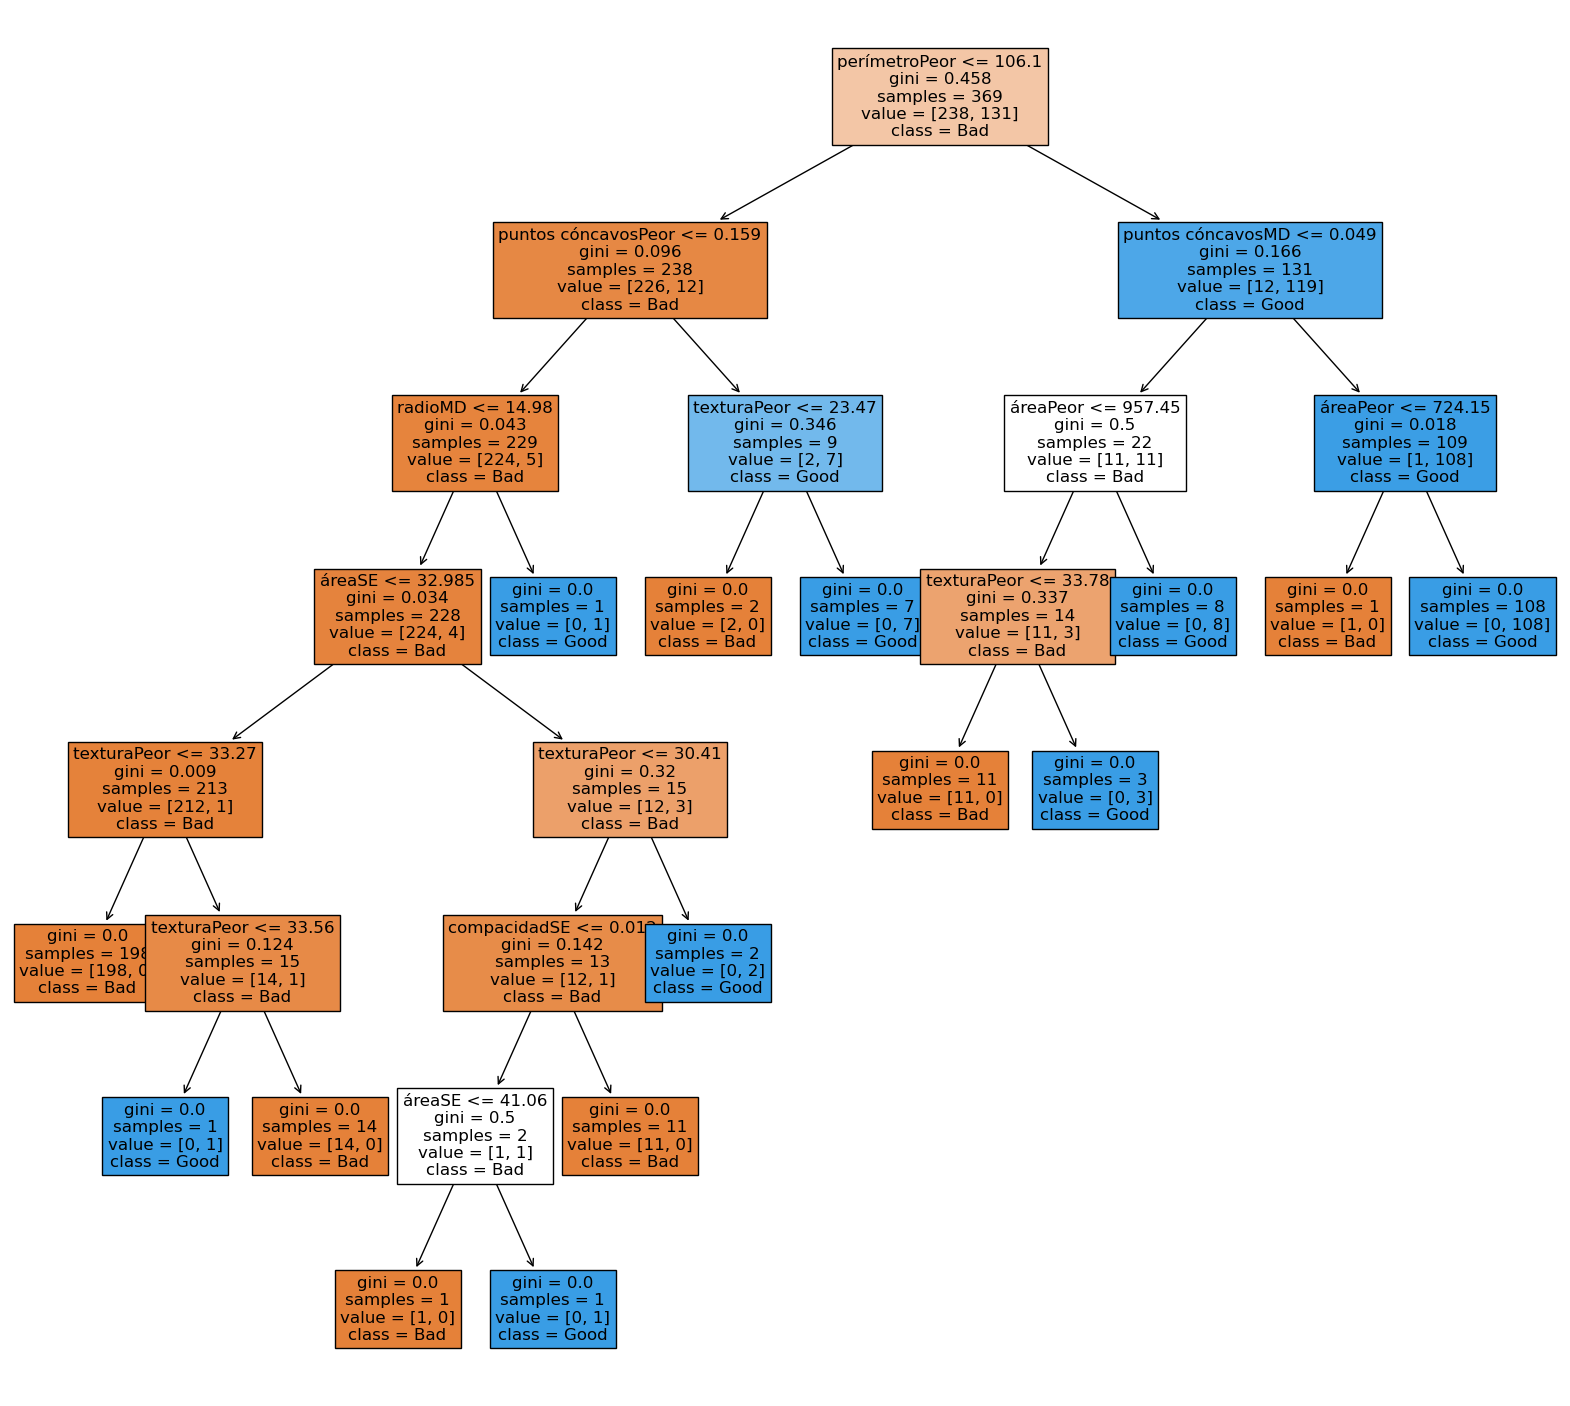

In [57]:
#Graficamos nuestro arbol de decision con una profundidad de 5 
#podemos concluir que una mayor acidez y una menor acidez volatil son caracteristicas imporantes para un buen vino
from sklearn import tree 
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(20,18)) 
_ = tree.plot_tree(clf,
               feature_names = features_names,
               class_names = {0:"Bad",1:"Good"},
               filled = True,
               fontsize = 12)

In [83]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import heatmap
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier

from pylab import rcParams

In [84]:
print(df.groupby('DG').size()) # agrupamos los datos según el campo "Class" y se cuenta los datos en cada grupo
print(df.shape)
#print(pd.value_counts(dfDataIni['Class'], sort = True))

DG
0    357
1    212
dtype: int64
(569, 33)


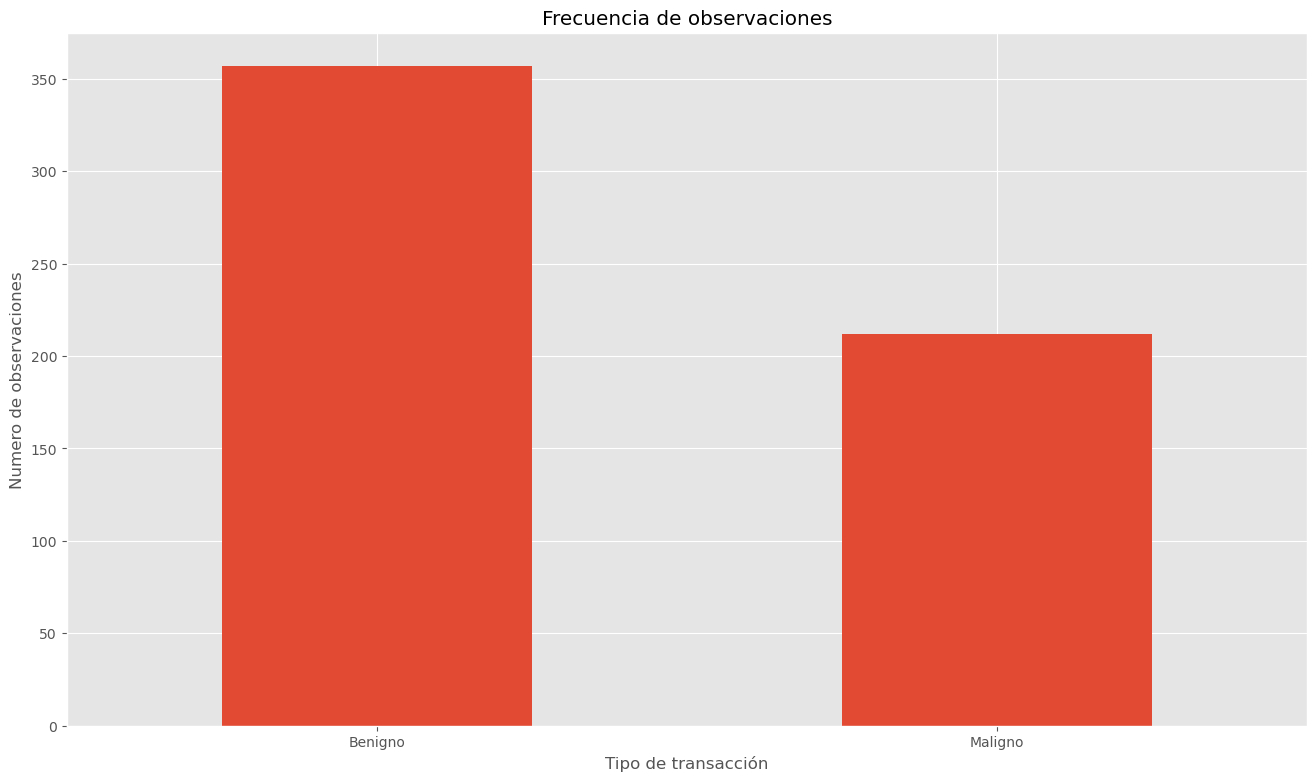

In [92]:
count_classes = df.value_counts(df['DG'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
LABELS=['Benigno','Maligno']
plt.xticks(range(2), LABELS)
plt.title("Frecuencia de observaciones")
plt.xlabel("Tipo de transacción")
plt.ylabel("Numero de observaciones");

In [96]:
#definimos nuestras etiquetas y features
y = df['DG']
X = df.drop('DG', axis=1)
#dividimos en sets de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

#creamos una función que crea el modelo que usaremos cada vez
def run_model(X_train, X_test, y_train, y_test):
    clf_base = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg")
    clf_base.fit(X_train, y_train)
    return clf_base

In [ ]:
#ejecutamos el modelo "tal cual"
model = run_model(X_train, X_test, y_train, y_test)

In [2]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier

from collections import Counter

ModuleNotFoundError: No module named 'imblearn'